**Classification of pattern sequences to similar groups - Softmax Regression (Classification) as Multi-layer Perceptron in TensorFlow 2**

This model is designed to classify attributes of the patterns / pattern languages or sequences to a set of the classes. Class with a highest probability is a prediction for a given sample in training dataset.

Because dataset of the attributes is still being consulted, sample dataset with 11 independent variables is provided. Dependent variable is a label, class. There are 10 classes in a dataset, classes 5, 6 and 7 are most present (some patterns are used more often than the others).

Currently these options are being considered:

- term frequencies (tf)
- inverse frequencies (tf-idf)
- probabilities (from our work Modelling of Organizational Pattern Sequences in Bayesian Network)
- Table 1 from section 3.3. in http://www2.fiit.stuba.sk/~vranic/pub/ExtractingRelations.pdf

Other unresolved (implementation) problems:

- current implementation fails to work with categorical entropy and 10 output neurons, but works well with sparse categorical crossentropy. Usual cause for this is that dependent variable (pattern sequence encoded with number) is not one-hot encoded. See what one-hot encoding means.
- 2 hidden layers, one of them with 350 neurons is still a lot for this small dataset
- work with smaller batches

<ins>Example how to interpret output from this Neural network</ins>:

Let's say prediction for a first row in our training dataset is a vector of values: (0.08568677, 0.09945365, 0.08751229, 0.09474804, 0.1098659 , 0.12171782, 0.10679027, 0.10450635, 0.10343555, 0.08628327). This means first row in dataset has been assigned to class 6 because of its highest probability (0.1211782). Class 6 can represent organizational pattern, organizational pattern language or sequence of organizational patterns.

Please note that prediction is correct if it is consistent with actual class. Accuracy of the model is one of the metrics used to evaluate this behavior.

Theory behind this can be found in a book Dive into Deep Learning: https://d2l.ai/chapter_linear-networks/softmax-regression.html

Epoch 1/10
4/4 [==============================] - 1s 143ms/step - loss: 2.7049 - accuracy: 0.2334 - val_loss: 1.2451 - val_accuracy: 0.4323
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 1.3533 - accuracy: 0.4224 - val_loss: 1.2412 - val_accuracy: 0.5052
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 1.2591 - accuracy: 0.4485 - val_loss: 1.2505 - val_accuracy: 0.4479
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 1.2656 - accuracy: 0.4498 - val_loss: 1.2116 - val_accuracy: 0.5469
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 1.2454 - accuracy: 0.4589 - val_loss: 1.2176 - val_accuracy: 0.5469
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 1.2160 - accuracy: 0.4902 - val_loss: 1.1649 - val_accuracy: 0.5469
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 1.1937 - accuracy: 0.4850 - val_loss: 1.1573 - val_accuracy: 0.5312
Epoch 8/10
4/4 [==========

array([[0.0887127 , 0.09665081, 0.08611178, 0.09471374, 0.1082349 ,
        0.11600354, 0.10974717, 0.10946868, 0.10207218, 0.08828447],
       [0.08333115, 0.09454614, 0.08240749, 0.09025589, 0.11329148,
        0.11862156, 0.11522208, 0.11197452, 0.10828885, 0.08206094],
       [0.07334598, 0.08761639, 0.06850325, 0.08267133, 0.12176839,
        0.13136259, 0.13211589, 0.13460399, 0.09450316, 0.07350899],
       [0.08819015, 0.0923655 , 0.08730692, 0.09621565, 0.11222098,
        0.10852437, 0.11819601, 0.10600043, 0.10217389, 0.08880609],
       [0.08164017, 0.09084489, 0.08320243, 0.0870114 , 0.12047805,
        0.12931478, 0.11636385, 0.10532021, 0.10532157, 0.08050272],
       [0.07376951, 0.08536615, 0.07400102, 0.09083401, 0.12295613,
        0.12406221, 0.12534305, 0.12052239, 0.10940098, 0.07374449],
       [0.08437054, 0.09214461, 0.07614991, 0.08896127, 0.11065474,
        0.12452541, 0.11668158, 0.1191465 , 0.10576412, 0.08160128],
       [0.08126526, 0.09490899, 0.0684273

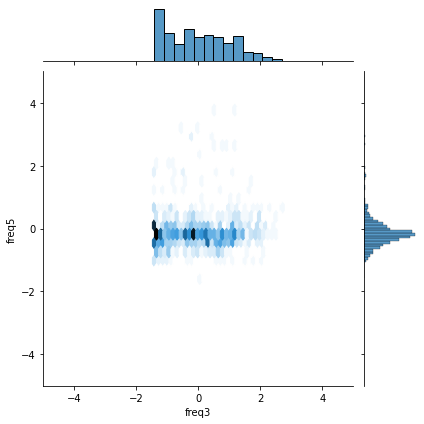

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow import keras

tf.keras.backend.clear_session()

# we can also use probabilities instead of n-gram frequencies (tf-idf or binary encoded)
frequencies = pd.read_csv('dataset.csv', sep = ';')
train, val, test = np.split(frequencies.sample(frac=1, random_state=42), [int(.6*len(frequencies)), int(.8*len(frequencies))])

# classes 5, 6 and 7 are most present
num_classes = np.bincount(train['pattern']) 

model = Sequential([
    Dense(11, activation='relu'),
    Dense(350, activation='relu'), 
    Dense(50, activation='relu'), 
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train = train["pattern"]
y_test = test["pattern"]
del train["pattern"]
del test["pattern"]
del val["pattern"]

model.fit(train, y_train, epochs=10, 
          batch_size=250, verbose=1,
          validation_split=0.2)

results = model.evaluate(test, y_test, verbose = 1)
print('test loss, test acc:', results)

# some classes are present more than the others. Our task here would be to classify imbalanced data
# 1. we normalize them

scaler = StandardScaler()
train_features = scaler.fit_transform(train)
val_features = scaler.transform(val)
test_features = scaler.transform(test)

train_labels = np.array(y_train)
bool_train_labels = train_labels != 0

# 2. then we're able to visualize their distributions

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train.columns)

sns.jointplot(x=pos_df['freq3'], y=pos_df['freq5'], kind='hex', xlim=(-5,5), ylim=(-5,5))

model.summary()
model.predict(train_features[:10])